# Using Modules in Python
In Python, modules are files containing Python code that can be imported and used in your Python scripts. There are a wide range of built-in modules, as well as third-party modules that can be installed using package managers like pip. You can also build your own to provide a way to organize and reuse code, making it easier to build complex programs, however for now, we'll explore just how to use modules in Python for bioinformatics tasks.

We've already used some modules through the week, most notably matplotlib for graphing so hopefully it already makes a little of sense!

## Importing Modules
To use a module in Python, you need to import it into your script. There are a few ways to import modules but most simply just using the word import, followed by the name of the module works

In [1]:
import this

In [ ]:
import antigravity


Now lets look at something useful! We'll first use math for simplicity, then do some bioinformatics afterwards. You can import the entire module and access its functions, classes, and variables using the module name as a prefix.

You can import the entire module and access its functions, classes, and variables using the module name as a prefix. 

In [ ]:
import math               ## As a Brit it is frustrating writing math instead of maths, but we can't have everything

radius = 5
area = math.pi * math.pow(radius, 2)      ## pi and pow are specifically from the math module
print("The area of a circle with radius {} is: {}".format(radius, area))

However that can be dangerous as modules can be really large, and also contain functions that you're unaware of and can clash with your own code. You're safer either importing just the functions you want, or use your own alias to avoid clashes if you need the whole module for certain.

In [ ]:
from math import sqrt, factorial

number = 16
square_root = sqrt(number)
factorial_result = factorial(number)
print("The square root of {} is: {}".format(number, square_root))
print("The factorial of {} is: {}".format(number, factorial_result))

Using an alias also just saves on loads of typing! Imagine having to write the first one instead of the second (although as we have used a function here, it is more simple):

In [ ]:
import matplotlib.pyplot

def plot_data(x, y):
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.xlabel("How many times you've typed it out")
    matplotlib.pyplot.ylabel("Feels")
    matplotlib.pyplot.show()

x = [1,2,3,6]
y = ["It's fine", "a bit annoying", "I hate this", "ok I'll use aliases"]

plot_data(x, y)

Using the import X as Y is really handy!

In [ ]:
import matplotlib.pyplot as plt

def plot_data(x, y):
    plt.plot(x, y)
    plt.xlabel('Feels')
    plt.ylabel("How many times you've done it")
    plt.show()

x = [1,2,3,6]
y = ["It's fine", "It's fine","It's fine","It's fine"]

plot_data(x, y)

# Biopython
Biopython is a widely-used Python library for bioinformatics that offers a huge range of tools and modules. (Honestly, it has everything in there). Think back to the work we did loading, parsing, and interpretting simple fasta files. Biopython has built in class objects that already know what different formats should look like, and so gives you easy access.

That's just one advantage, but it also has lots of common and complex functions and methods to ease your coding requirements too.

Here's an example of using Biopython's Seq module to perform a simple sequence analysis:

## Sequence Manipulation

In [ ]:
# Remember to only import the functions you're interested in
from Bio.Seq import Seq

# Create a DNA sequence
sequence = Seq("ATGCAGTACGTC")

print(sequence)
print(type(sequence))


Oh no! The module isn't installed! 99.9% of the time it's really easy to install a python module using pip (python installation program). On your own computer or server you'd type this command without the ```!``` but that is required on collab/Jupyter to tell it that you're using a bash command, not python.

**Once it's intalled try and run the command above again.**

In [ ]:
!pip install biopython 

One thing to note here. While the ```print(sequence)``` command outputs the sequence, we are not actually looking at a string. The ```type()``` shows us that it is a class (more on what a class is later). However, it has been defined that when asked to print, it will output the sequence.

First lets look at using the library.

The Biopython Seq module has various built in functions for manipulating sequences. Looking back to the exercise to complement and reverse complement a string of DNA, this is much simpler! 

In [ ]:
# Print the reverse complement
print("Reverse complement:", sequence.reverse_complement())

Compare what we've just done back to methods like ```.count()```. The ```.reverse_complement()``` method works in the same way, by having functions and definitions hidden in the background. It's just that this new method came from inside a 3rd party library rather than built into python itself.

Why build our own complement and reverse_complement functions, when a library can do it for us??

What functions are included in our module? Often it's easier to use Google or the official documentation, but you can also use the ```dir()``` function to print them:

In [ ]:
dir(Seq)

#### Exercise 

1. Read the insulin sequence into a new biopython sequence object
2. Transcribe this DNA sequence into RNA, and then into the amino acid sequence using biopython seq methods (```.transcribe()``` is DNA -> RNA, and ```.translate()``` is DNA/RNA -> amino acids).
3. Extension: Print the Amino acid sequence with correct spacing so that it aligns below the RNA output i.e.:

```
        ....CCAGGCUUGAGCCAGGGU....
        ....-Q--A--*--A--R--V-....
```

In [ ]:
insulin = """CTCGAGGGGCCTAGACATTGCCCTCCAGAGAGAGCACCCAACACCCTCCAGGCTTGA
GCCAGGGTGTCCCCTTCCTACCTTGGAGAGAGCAGCCCCAGGGCATCCTGCAGGGGGTGC
TGGGACACCAGCTGGCCTTCAAGGTCTCTGCCTCCCTCCAGCCACCCCACTACACGCTGC
TGGGATCCTGGATCTCAGCTCCCTGGCCGACAACACTGGCAAACTCCTACTCATCCACGA
AGGCCCTCCTGGGCATGGTGGTCCTTCCCAGCCTGGCAGTCTGTTCCTCACACACCTTGT
CATGTCCTCTCCAGCTGCCGGGCCTCAGAGCACTGTGGCGTCCTGGGGCAGCCACCGCAT"""

# Remember to import the module



---

## Bioinformatic file formats with Biopython

When we have worked with files before it has been using them in the context of plain text and we format the input/output in our own way. That involved saving header lines separately, and using with and while loops.

Biopython can help us make this easier because it already understands what different bioinformatic formats should look like. 

Here let's read in a fasta file containing a range of CO1 sequences from fungi. Note how we now automatically have (at least) two elements: the description, and the sequence.

Using the SeqIO function ```.parse()``` and specifying "fasta" format, it does all the hard work for us.

In [6]:
from Bio import SeqIO, Seq

count = 0
for seq_record in SeqIO.parse("/content/co1_sequences.fasta", "fasta"):
    
    # Print the header, sequence, and length of each record as we go through the file
    print(seq_record.description)
    print(seq_record.seq)
    print("Sequence length:", len(seq_record))
    print()

    count += 1

print("============")
print(f"Imported {count} sequences")

OQ616982.1 Nothophytophthora chlamydospora isolate CL316 cytochrome oxidase subunit I (coxI) gene, partial cds; mitochondrial
AATCATAAAGATATTGGTACTTTATATTTAATTTTTAGTGCTTTTGCAGGTATTGTTGGTACAACATTATCTGTTTTAATTCGAATGGAATTAGCACAACCTGGTAATCAAATTTTTATGGGAAATCATCAATTATATAATGTTGTTGTAACAGCACATGCATTTATTATGGTATTCTTTTTAGTTATGCCAGCGTTAATTGGTGGTTTTGGAAACTGGTTTGTACCTTTAATGATTGGTGCACCAGATATGGCTTTCCCACGTATGAATAATATTAGTTTTTGGTTATTACCCCCAGCTTTATTATTATTAGTATCATCAGCTATTGTTGAATCAGGTGCTGGTACTGGTTGGACTGTTTACCCTCCTTTATCAAGTGTACAAGCACATTCAGGACCTTCAGTAGATTTAGCTATATTTAGTTTACATTTAGCAGGTATTTCATCTTTATTAGGTGCTATAAATTTTATTTCTACTATATATAATATGAGAGCTCCTGGTTTAAGTTTCCATAGATTACCTTTATTTGTTTGGTCAGTTTTAATTACAGCTTTTCTTTTATTATTAACTTTACCTGTTTTAGCTGGAGCAATTACAATGTTATTAACAGATAGAAATTTAAATACTTCTTTTTACGATCCATCAGGTGGAGGAGATCCCGTATTATATCAACATTTATTTTGGTTTTTTGGGCATCCTGAAGTTTATGTTTTAATTTTACCGGCTTTTGGTATTATTAGTCAAGTTTCTGCAGCTTTTGCAAAAAAAAATGTTTTTGGTTATTTAGGTATGGTTTATGCTATGTTATCAATAGGTTTATTAGGTTCGATTGTATGGGCACATCATATGTTTACTGTAGGTTTAGATGTTGATA

Lets first select just some records from the input file (if the description contains PA22), and keep them in their own list.

Next lets use the ```.translate()``` method again to convert the sequence to amino acid but this time specify the codon coding table.

In [9]:
from Bio import SeqIO, Seq

PA22_co1s = []
for seq_record in SeqIO.parse("/content/co1_sequences.fasta", "fasta"):    
    if "PA22" in seq_record.description:
        PA22_co1s.append(seq_record)


for seq_record in PA22_co1s:
    # Print the header, sequence, and length of each record as we go through the file
    print(seq_record.description)
    
    # Use the .translate method to get the amino acid sequence (using mitochondira coding table)
    new_aa = seq_record.seq.translate(table=2)
    print(new_aa)
    print("")
    

OQ605417.1 Pythiaceae sp. MHJ-2022a isolate PA229 cytochrome oxidase subunit II (cox2) gene, partial cds; hypothetical protein (orf32) gene, complete cds; and cytochrome oxidase subunit I (coxI) gene, partial cds; mitochondrial
TTTCAAGATCCTGCAACACCAGTTATGGAAGGTATTATAAACTTTCATCATGATTTAATGTTTTTTTTAATTATTGTAACTGTTTTTGTTTGTTGGATGTTATTTAGAGTTATTATTCTTTTTGATGAAAAAAAAAATCCAGTACCTTCTACTATTGTACACGGTGCTACTATTGAAATTATTTGGACTTCTATTCCTGCTTTAATCTTGTTAACTGTTGCTATTCCTTCATTTGCTTTATTATATTCTATGGATGAAGTTATTGATCCTATAATTACTCTTAAAGTAATAGGTAGTCAATGGTATTGGAGTTATGAATATTCTGATAATTTAGAATTTGCAGATGAGCCTTTAATTTTTGATAGTTATATGGTACAAGAAGATGATTTAGAAATAGGTCAACTTAGATTATTAGAAGTTGATAATCGTGTTGTAGTTCCTACAAATAGTCATATAAGAGTTTTAATTACTGCTTCAGATGTATTACATTCATGGGCTATACCTTCTTTAGGTTTAAAATTAGATGCTTGTCCTGGTCGTTTAAATCAAACTTCTATGTTTATTAAAAGAGAAGGTGTTTTTTATGGACAATGTAGTGAAATTTGTGGAGTAAATCATGGTTTTATGCCTATTGTTGTTGAAGCTGTTTCATTAGAAGATTATTTAACTTGGTTAAAAAATAAAATTAATTTTGATTTAGAAGCTTAATTAAAAAATTTTTATGTTTTTTAAAATAATTGGTACTATTCTTATAATATTGTTATTATTTTCA

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


What exactly is a SeqRecord? It's its own defined ***class*** (More on that in the supplementary section)

In [16]:
type(seq_record)

Bio.SeqRecord.SeqRecord

### Exercise - Importing with SeqIO

Objective: Using the CO1_sequences file, output the first 30 DNA base pairs of sequences that encode Phenylalenine (F) in their first codon (startswith).

Based on your confidence, either:
- Create an empty list, add each DNA sequence to it and output the relevant DNA sequences
- Create a dictionary where the ID is the key and the aa sequence is the value (the ID is the header part before the first whitespace, and can be accessed with ```seq_record.id```). 

**Remember you are reading in DNA, and want to output DNA. But to test the amino acid!**

Extension: Output the relevant sequences to a file named Phenylalenine_coding_30bp.fasta

Note: Lets pretend that we want the rest of the data later in our code, so complete the read data loop first, and then do the filtering in a second loop.

In [ ]:
## Write here
from Bio import SeqIO, Seq


---

## Embl / GenBank formats

Lets look at a different type of bioinformatic data type: an EMBL file (It's similar to a GenBank file format if you have seen that before, just European!). Open the .embl text file and explore what data is in there before doing the next step. Quite a lot right?! 

Reading the data with SeqIO means that it will take the plain text file and assign the data to known variable names and methods.

We can loop through it as we did above (although this file has just one record in it), or alternatively we can use the "iterator" format. This means having your code only move on through the loop when you explicitly use ```next()```. Not as usefull most of the time, but an alternative method. 

In [ ]:
from Bio import SeqIO

# Note the scond parameter is the file format
record_iter = SeqIO.parse("/content/am181037.embl", "embl")

first_record = next(record_iter)
print(first_record)

It also contains the DNA sequence object too of course!

In [ ]:
print(first_record.seq)
print(len(first_record.seq))

That's just the plain text that you get if you open it usually and also hides the list of features. Let's do something computational. 

First lets look at some of the data that is in our new object:

In [ ]:
## Access annotations 
print(first_record.annotations["organism"])
print(first_record.annotations["taxonomy"])

We can use a loop to look through the full list of features

In [12]:
# Features is the term for all genes, coding sequences trna's sequence regions
for feature in first_record.features:
  print("Type is:", feature.type, "\tQualifiers are:", feature.qualifiers)

Type is: source 	Qualifiers are: {'organism': ['Vulpes vulpes'], 'organelle': ['mitochondrion'], 'mol_type': ['genomic DNA'], 'country': ['Sweden'], 'db_xref': ['taxon:9627']}
Type is: tRNA 	Qualifiers are: {'gene': ['tRNA-Phe'], 'product': ['transfer RNA-Phe']}
Type is: rRNA 	Qualifiers are: {'gene': ['12S rRNA'], 'product': ['12S ribosomal RNA']}
Type is: tRNA 	Qualifiers are: {'gene': ['tRNA-Val'], 'product': ['transfer RNA-Val']}
Type is: rRNA 	Qualifiers are: {'gene': ['16S rRNA'], 'product': ['16S ribosomal RNA']}
Type is: tRNA 	Qualifiers are: {'gene': ['tRNA-Leu(UUR)'], 'product': ['transfer RNA-Leu(UUR)']}
Type is: CDS 	Qualifiers are: {'transl_table': ['2'], 'gene': ['NADH1'], 'product': ['NADH dehydrogenase subunit 1'], 'db_xref': ['GOA:Q08GV4', 'InterPro:IPR001694', 'InterPro:IPR018086', 'UniProtKB/TrEMBL:Q08GV4'], 'protein_id': ['CAJ57144.1'], 'translation': ['MFFINILSLIVPILLAVAFLTLVERKVLGYMQLRKGPNIVGPYGLLQPIADAVKLFTKEPLRPLTSSMSMFILAPILALSLALTMWIPLPMPYPLINMNLGVLFMLAMSSLAVY

The big question now is what to do with all this information!

### Exercise: data filter

Objective: Print the gene name and coding sequence for each gene feature (A gene is defined by it's ***type*** being "CDS"). 

1. First try printing each out to see what data they contain, and then print only features where `type` == "CDS"
2. You have the full genome sequence in record.seq (just like with a simple fasta file). Use the ```location.start``` and ```location.end``` parameters to print just the region between them for each feature.
3. Print the gene name. You need to `.get()` this by searching the `qualifiers` dictionary for the key `gene`

Note: `feature.qualifiers.get('gene')` returns a list of one item frustratingly. You can get just the element alone with `feature.qualifiers.get('gene')[0]`

Biopython parameters can be pretty complicated and need some time with the manual, so here's some useful commands you'll need:

```
- feature.type
- feature.qualifiers
- feature.location.start / feature.location.end
```

In [11]:
from Bio import SeqIO

# Read the data in
record_iter = SeqIO.parse("/content/am181037.embl", "embl")
record = next(record_iter)

mito_genes = {}

for feature in record.features:
    print(feature)


type: source
location: [0:16813](+)
qualifiers:
    Key: country, Value: ['Sweden']
    Key: db_xref, Value: ['taxon:9627']
    Key: mol_type, Value: ['genomic DNA']
    Key: organelle, Value: ['mitochondrion']
    Key: organism, Value: ['Vulpes vulpes']

type: tRNA
location: [0:69](+)
qualifiers:
    Key: gene, Value: ['tRNA-Phe']
    Key: product, Value: ['transfer RNA-Phe']

type: rRNA
location: [69:1026](+)
qualifiers:
    Key: gene, Value: ['12S rRNA']
    Key: product, Value: ['12S ribosomal RNA']

type: tRNA
location: [1026:1093](+)
qualifiers:
    Key: gene, Value: ['tRNA-Val']
    Key: product, Value: ['transfer RNA-Val']

type: rRNA
location: [1093:2671](+)
qualifiers:
    Key: gene, Value: ['16S rRNA']
    Key: product, Value: ['16S ribosomal RNA']

type: tRNA
location: [2671:2746](+)
qualifiers:
    Key: gene, Value: ['tRNA-Leu(UUR)']
    Key: product, Value: ['transfer RNA-Leu(UUR)']

type: CDS
location: [2748:3705](+)
qualifiers:
    Key: db_xref, Value: ['GOA:Q08GV4', 'I

Before we go on to the next section, add a line to output your genes and sequences to a dictionary, as we'll want to come back to it, with a line such as: ```mito_genes[geneID] = feature_seq```

---

## Writing to defined file formats

We can also use Biopython to write out our sequences, saving them to a file in the correct format, rather than defining it ourselves. That'll save lots of effort!

Lets output our new extracted sequences with a new header into a new file by first putting them into a list, and then saving that.

Firstly we will use the SeqRecord module to turn our sequences into SeqRecords:

In [13]:
from Bio.SeqRecord import SeqRecord

data_to_write = []

# Using the dictionary from the last exercise
for id, extracted_seq in mito_genes.items():

    # Create a SeqRecord from our dictionary of data
    record = SeqRecord(extracted_seq, id)
    
    # Add it to a list
    data_to_write.append(record)

print(data_to_write)


And now using the normal output format combined with the ```SeqIO.write()``` function we can output it.

For a fasta file it requires the format: ```sequence, id, description``

In [14]:
from Bio import SeqIO

with open("my_extracted_MT_seqs.fna", 'w') as outputFile:
  # Write the list to a file, specifying fasta format
  SeqIO.write(data_to_write, outputFile, "fasta")

[]


<details>
<summary>Input for this section if previous section not completed</summary>

```
from Bio import SeqIO
mito_genes = {}

# Read the data in
record_iter = SeqIO.parse("/content/am181037.embl", "embl")
first_record = next(record_iter)

for feature in first_record.features:
    #print(feature)

    if feature.type == "CDS":
        start = feature.location.start
        end = feature.location.end
        geneID = feature.qualifiers.get('gene')[0]
        seqExtrct = first_record.seq[start:end]

        mito_genes[geneID] = seqExtrct
```

</details>

---

Okay. That was a lot! It can get quite complex when dealing with complex third party modules as we don't know all of their logic when creating functions, and it can become really deep with heirarchies of data. Lets keep it simple now and look at a few other cool features of biopython.

## Sequence Alignment

Biopython provides functionality for sequence alignment, allowing you to perform pairwise and multiple sequence alignments. The Bio.Align module offers algorithms such as Needleman-Wunsch and Smith-Waterman for global and local alignments. It also supports accessing alignment scores, sequences, and alignment visualization.

In [15]:
from Bio import Align
from Bio.Seq import Seq

# Define two DNA sequences - Note that this is just a very simplified version of the sequence file input from above
seq1 = Seq("TATGCTGTACGTCGGGAT")
seq2 = Seq("ATGCTTACGTCAGGGGAA")

aligner = Align.PairwiseAligner()

# Perform pairwise alignment
alignments = aligner.align(seq1, seq2)

for a in alignments:
    print("alignment score:", a.score)
    print(a)   



alignment score: 15.0
target            0 TATGCTGTACGTC-GGG-AT- 18
                  0 -|||||-||||||-|||-|-- 21
query             0 -ATGCT-TACGTCAGGGGA-A 18

alignment score: 15.0
target            0 TATGCTGTACGTC-GG-GAT- 18
                  0 -|||||-||||||-||-||-- 21
query             0 -ATGCT-TACGTCAGGGGA-A 18

alignment score: 15.0
target            0 TATGCTGTACGTC-G-GGAT- 18
                  0 -|||||-||||||-|-|||-- 21
query             0 -ATGCT-TACGTCAGGGGA-A 18

alignment score: 15.0
target            0 TATGCTGTACGTC--GGGAT- 18
                  0 -|||||-||||||--||||-- 21
query             0 -ATGCT-TACGTCAGGGGA-A 18

alignment score: 15.0
target            0 TATGCTGTACGTC-GGG-A-T 18
                  0 -|||||-||||||-|||-|-- 21
query             0 -ATGCT-TACGTCAGGGGAA- 18

alignment score: 15.0
target            0 TATGCTGTACGTC-GG-GA-T 18
                  0 -|||||-||||||-||-||-- 21
query             0 -ATGCT-TACGTCAGGGGAA- 18

alignment score: 15.0
target            0 TATGCTGTAC

It actually has more data in that object than we just saw and many modifiable variables. This is a simple object but they can grow to contain a huge amount of parameters and variables.

## Pyhlogenetics

Lets look at a phylogenetic example and draw a tree:

In [111]:
from Bio import Phylo

# Read a Newick tree file
tree = Phylo.read("/content/primates.nwk", "newick")

# Print tree
Phylo.draw_ascii(tree)

                                       _________ Human
                         _____________|
                    ____|             |_________ Chimpanzee
                   |    |
  _________________|    |_______________________ Gorilla
 |                 |
 |                 |____________________________ Orangutan
_|
 |                                               __________________ Rhesus
 |                                 _____________|
 |                                |             |__________________ Baboon
 |________________________________|
                                  |         _______________________ Marmoset
                                  |________|
                                           |_______________________ Tarsier



Really, I like this module just because it's cool to see a tree represented so cleanly, but also shows how simple it is to handle data if there is a module that already understands the format.

But be sure to note, the format of this data object is very different to the sequence object from the last example. Modules such as Biopython are very varied behind the scenes with complex classes, but can be interacted with simply.

In [112]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.4)
            Clade(branch_length=0.1)
                Clade(branch_length=0.3)
                    Clade(branch_length=0.2, name='Human')
                    Clade(branch_length=0.2, name='Chimpanzee')
                Clade(branch_length=0.5, name='Gorilla')
            Clade(branch_length=0.6, name='Orangutan')
        Clade(branch_length=0.7)
            Clade(branch_length=0.3)
                Clade(branch_length=0.4, name='Rhesus')
                Clade(branch_length=0.4, name='Baboon')
            Clade(branch_length=0.2)
                Clade(branch_length=0.5, name='Marmoset')
                Clade(branch_length=0.5, name='Tarsier')


Before we move on lets draw it with matplotlib and also use the ```.common_ancestor()``` function that comes with the phylo module.

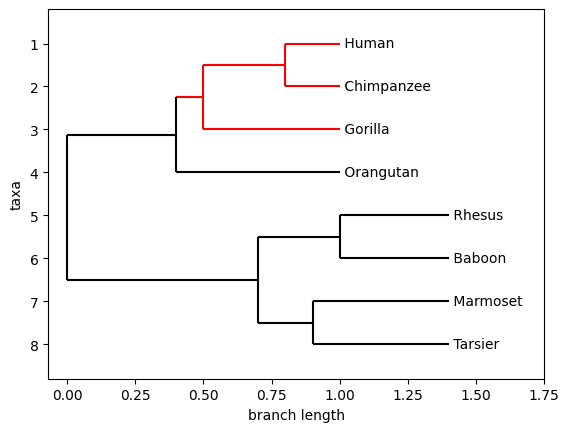

In [113]:
from Bio import Phylo

# Read a Newick tree file
tree = Phylo.read("/content/primates.nwk", "newick")
tree = tree.as_phyloxml()

# Set labeled nodes
mcra = tree.common_ancestor({"name": "Human"}, {"name": "Gorilla"})
mcra.color = "red"

Phylo.draw(tree)

<details>
<summary>Honestly, I just think it's neat!</summary>

![neat](neat.png)

</details>

### Alignment into Phylogenetics example

Doing a larger multiple sequence alignment and putting it into a tree takes more steps but is quite effective! Here's just a demonstration from our CO1 genes above.

Alignment with 9 rows and 700 columns
AATCATAAAGATATTGGTACTTTATATTTAATTTTTAGTGCTTT...CTG OQ616982.1
TTTCAAGATCCTGCAACACCAGTTATGGAAGGTATTATAAACTT...TAG OQ605417.1
TTTCAAGATCCTGCAACACCAGTTATGGAAGGTATTATAAACTT...TAG OQ605416.1
TTTCAAGATCCTGCAACACCAGTTATGGAAGGTATTATAAACTT...TAG OQ605415.1
TTTCAAGATCCTGCAACACCAGTTATGGAAGGTATTATAAACTT...TAG OQ605414.1
TTTCAAGATCCTGCAACACCAGTTATGGAAGGTATTATAAACTT...GCT OQ605413.1
GGCAATTAGGTTTTCAAGATCCAGCAACTCCTGTTATGGAAGGT...TGG OQ605412.1
GCAATTAGGTTTTCAAGATCCCGCAACTCCAGTTATGGAAGGTA...AAT OQ605411.1
GCAATTAGGTTTTCAAGATCCAGCAACTCCAGTTATGGAAGGTA...ACT OQ605410.1


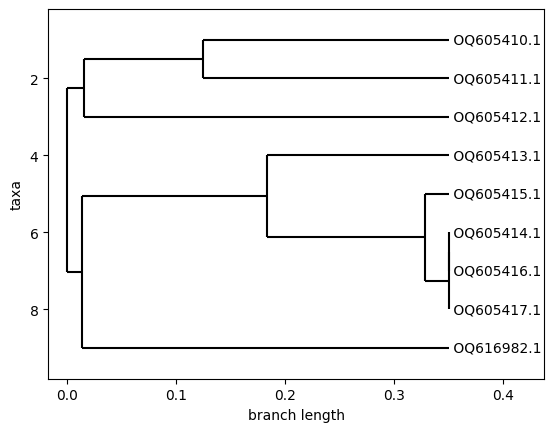

In [23]:
from Bio.Align import MultipleSeqAlignment
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

All_co1s = []
for seq_record in SeqIO.parse("C:/Users/danie/Google Drive/Work/CompassBioinformatics/Courses/IntroToPython/ClassData/co1_sequences.fasta", "fasta"):    
    All_co1s.append(seq_record[:700])

# Align sequences (Really basic - in reality use an external program i.e. clustalW)
aligned_seqs = MultipleSeqAlignment(All_co1s)
print(aligned_seqs)

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aligned_seqs)

# Construct the phylogenetic tree using UPGMA
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Hide internal labels
for clade in tree.find_clades():
    if not clade.is_terminal():
        clade.name = None

# Draw the tree
Phylo.draw(tree)